In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


## INITIAL VAR MODEL 

In [57]:
df = pd.read_csv('model_data/aggregateddata.csv',index_col=0,parse_dates=True) #ONTARIO WIDE DATA 

In [58]:
df['total_individuals_fully_vaccinated']= df['total_individuals_fully_vaccinated'].replace(np.nan,0)

In [59]:
df.columns

Index(['report_date', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented',
       'total_doses_in_fully_vaccinated_individuals',
       'total_individuals_fully_vaccinated', 'Daily_Covid_Num',
       'Cum_Covid_Numbers'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   report_date                                  124 non-null    object 
 1   ICU                                          124 non-null    int64  
 2   ICU_vented                                   124 non-null    int64  
 3   hospitalizations                             124 non-null    int64  
 4   icu_crci_total                               124 non-null    int64  
 5   icu_crci_total_vented                        124 non-null    int64  
 6   total_doses_in_fully_vaccinated_individuals  116 non-null    float64
 7   total_individuals_fully_vaccinated           124 non-null    float64
 8   Daily_Covid_Num                              124 non-null    int64  
 9   Cum_Covid_Numbers                            124 non-null    int64  
dtypes:

In [92]:
df1 = df[['report_date', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented',
       'total_individuals_fully_vaccinated',
       'Daily_Covid_Num']]


df2 = df[['report_date', 'ICU', 'ICU_vented', 'hospitalizations',
       'icu_crci_total', 'icu_crci_total_vented',
       'total_individuals_fully_vaccinated',
       'Cum_Covid_Numbers']]




In [93]:
# df1a['report_date'] =pd.to_datetime(df1a['report_date'])

In [94]:
df1['report_date'] =pd.to_datetime(df1['report_date'])
df1=df1.set_index('report_date')
df2['report_date'] =pd.to_datetime(df2['report_date'])
df2=df2.set_index('report_date')

<ipython-input-94-a5f21b4ee9a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['report_date'] =pd.to_datetime(df1['report_date'])
<ipython-input-94-a5f21b4ee9a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['report_date'] =pd.to_datetime(df2['report_date'])


In [95]:
# df1 = df1a.drop('report_date',axis=1)
# df2 = df2a.drop('report_date',axis=1)



In [96]:
df1.head()

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
report_date,,,,,,,
2020-12-24,277,176,967,297,188,0.0,844
2020-12-30,323,204,1230,342,212,0.0,856
2020-12-31,337,210,1270,354,219,0.0,853
2021-01-01,336,221,1269,355,232,0.0,956
2021-01-02,322,220,1287,344,230,0.0,938


In [97]:
df1['total_individuals_fully_vaccinated']= df1['total_individuals_fully_vaccinated']- df1['total_individuals_fully_vaccinated'].shift(1)

In [100]:
df1 = df1.replace(np.nan,0)

In [101]:
df1 

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
report_date,,,,,,,
2020-12-24,277,176,967,297,188,0.0,844
2020-12-30,323,204,1230,342,212,0.0,856
2020-12-31,337,210,1270,354,219,0.0,853
2021-01-01,336,221,1269,355,232,0.0,956
2021-01-02,322,220,1287,344,230,0.0,938
...,...,...,...,...,...,...,...
2021-04-27,819,554,2336,875,589,1397.0,742
2021-04-28,818,571,2281,877,605,2603.0,788
2021-04-29,825,579,2248,884,620,3237.0,688


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-12-24 to 2021-05-01
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ICU                                 124 non-null    int64  
 1   ICU_vented                          124 non-null    int64  
 2   hospitalizations                    124 non-null    int64  
 3   icu_crci_total                      124 non-null    int64  
 4   icu_crci_total_vented               124 non-null    int64  
 5   total_individuals_fully_vaccinated  124 non-null    float64
 6   Daily_Covid_Num                     124 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 12.8 KB


In [103]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [104]:
df1.corr()

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
ICU,1.000000,0.987052,0.905225,0.999052,0.984208,-0.225706,0.568024
ICU_vented,0.987052,1.000000,0.922642,0.986446,0.998907,-0.165765,0.492949
hospitalizations,0.905225,0.922642,1.000000,0.892215,0.910881,-0.279640,0.620766
icu_crci_total,0.999052,0.986446,0.892215,1.000000,0.985380,-0.208415,0.543984
icu_crci_total_vented,0.984208,0.998907,0.910881,0.985380,1.000000,-0.141409,0.464746
total_individuals_fully_vaccinated,-0.225706,-0.165765,-0.279640,-0.208415,-0.141409,1.000000,-0.529578
Daily_Covid_Num,0.568024,0.492949,0.620766,0.543984,0.464746,-0.529578,1.000000


In [105]:
matrix = np.triu(df1.corr())

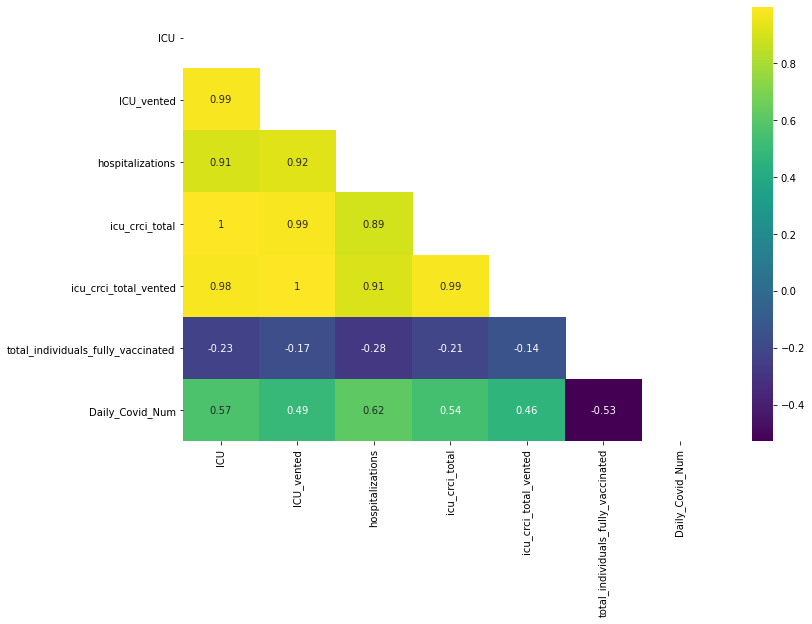

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),mask=matrix,cmap='viridis',annot=True)
plt.show()

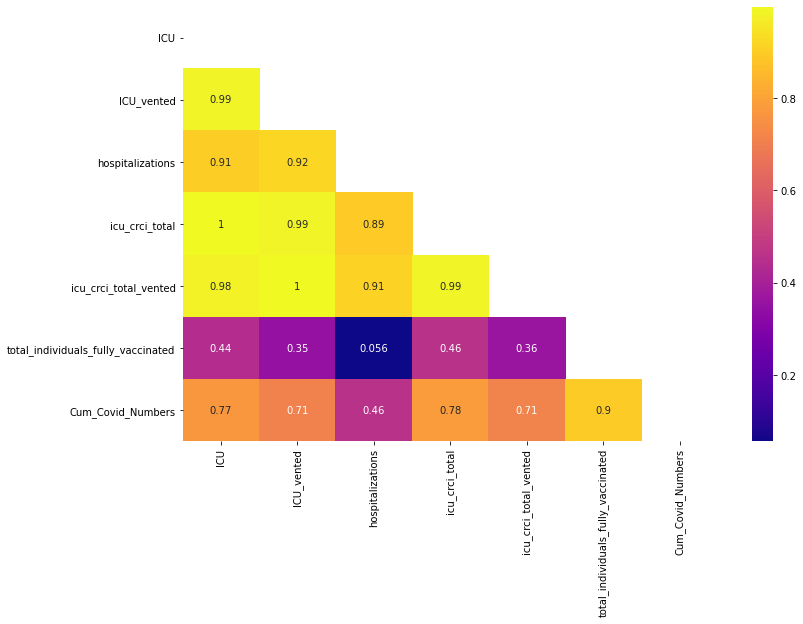

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),mask=np.triu(df2.corr()),cmap='plasma',annot=True)
plt.show()

In [108]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data,variables, test='ssr_chi2test', verbose=False):    
    """
    To check that coefficients of past values influences the present value
    
    Null hypothesis: The coefficients of past values in the times series are equal to zero 
    

   Response variable: rows, Predictors:columns
   The values in the table are the P-Values. P-Values lesser than the significance level (0.05), 
   implies the Null hypothesis that the coefficients of the corresponding past values is zero,
    that is, the X does not cause Y can be rejected.

    data      : dataframe containing the time series variables
    variables : names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df1, variables = df1.columns)

,ICU_x,ICU_vented_x,hospitalizations_x,icu_crci_total_x,icu_crci_total_vented_x,total_individuals_fully_vaccinated_x,Daily_Covid_Num_x
ICU_y,1.0000,0.0000,0.0002,0.1281,0.0000,0.0059,0.0000
ICU_vented_y,0.0000,1.0000,0.0000,0.0000,0.0048,0.0058,0.0000
hospitalizations_y,0.0000,0.0010,1.0000,0.0000,0.0010,0.0000,0.0000
icu_crci_total_y,0.0361,0.0000,0.0001,1.0000,0.0000,0.0073,0.0000
icu_crci_total_vented_y,0.0000,0.0025,0.0000,0.0000,1.0000,0.0046,0.0000
total_individuals_fully_vaccinated_y,0.0170,0.0018,0.0002,0.0259,0.0064,1.0000,0.0075
Daily_Covid_Num_y,0.0000,0.0021,0.0000,0.0000,0.0034,0.0001,1.0000


In [109]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen



In [111]:
nobs = 7  #number of days to forecast 
df1_train, df1_test = df1[0:-nobs], df1[-nobs:]

# Check size
print(df1_train.shape) 
print(df1_test.shape)  

(117, 7)
(7, 7)


In [112]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """
    Performing Augumented Dick-Fuller test to check Stationarity of given series and print report
    
    """
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-----------------------------------------------------')
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [113]:
# ADF Test on each column
for name, column in df1_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5295
 No. Lags Chosen       = 9
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.5189. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1088
 No. Lags Chosen       = 9
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.7115. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hy

In [114]:
# 1st difference since all series are non-stationary
df1_differenced = df1_train.diff().dropna()

In [115]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df1_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1565
 No. Lags Chosen       = 8
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.9435. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1764
 No. Lags Chosen       = 8
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.9413. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hy

In [116]:
#2nd differencing as some terms are still non-stationary 
df1_differenced = df1_differenced.diff().dropna()

In [117]:
for name, column in df1_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.5609
 No. Lags Chosen       = 7
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6252
 No. Lags Chosen       = 7
 Critical value 1%     = -3.493
 Critical value 5%     = -2.889
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

In [118]:
#3rd differencing as some terms are still non-stationary 

df1_differenced = df1_differenced.diff().dropna()

In [119]:
for name, column in df1_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "ICU" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6695
 No. Lags Chosen       = 10
 Critical value 1%     = -3.495
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "ICU_vented" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.2511
 No. Lags Chosen       = 11
 Critical value 1%     = -3.496
 Critical value 5%     = -2.89
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

In [120]:
model = VAR(df1_differenced)
for i in range(1,10,1):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  52.23680871941107
BIC :  53.58843454107383
FPE :  4.862718283468424e+22
HQIC:  52.785284406812046 

Lag Order = 2
AIC :  50.17190456198758
BIC :  52.720497253826736
FPE :  6.227346784490823e+21
HQIC:  51.205949649370346 

Lag Order = 3
AIC :  49.173824451326475
BIC :  52.93299247837241
FPE :  2.3554976773511315e+21
HQIC:  50.69880780896272 

Lag Order = 4
AIC :  48.258174426197115
BIC :  53.24178819215949
FPE :  9.931752268905354e+20
HQIC:  50.27955507934568 

Lag Order = 5
AIC :  47.02112018841733
BIC :  53.24331896201131
FPE :  3.156567573834717e+20
HQIC:  49.54444906726393 

Lag Order = 6
AIC :  46.21066179561164
BIC :  53.68586086380044
FPE :  1.6243923868800775e+20
HQIC:  49.24158350674632 

Lag Order = 7
AIC :  46.00528550202082
BIC :  54.74818355867191
FPE :  1.6551461779432748e+20
HQIC:  49.54954011977489 

Lag Order = 8
AIC :  45.30651936290191
BIC :  55.33210614168223
FPE :  1.1503024814087427e+20
HQIC:  49.369944238585916 

Lag Order = 9
AIC :  44.650209

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [121]:
x=model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,56.61,56.79,3.844e+24,56.68
1,52.00,53.44,3.838e+22,52.58
2,49.92,52.63,4.882e+21,51.02
3,49.09,53.06,2.200e+21,50.70
4,47.93,53.15,7.328e+20,50.05
5,46.83,53.31,2.710e+20,49.45
6,46.32,54.07,1.936e+20,49.46
7,45.85,54.85,1.551e+20,49.49
8,45.31,55.58,1.313e+20,49.47
9,44.26,55.79,7.770e+19,48.93


In [122]:
fitted_model = model.fit(12)

In [123]:
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, May, 2021
Time:                     09:37:36
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    50.4748
Nobs:                     102.000    HQIC:                   41.3629
Log likelihood:          -2211.41    FPE:                3.11770e+17
AIC:                      35.1624    Det(Omega_mle):     4.47862e+15
--------------------------------------------------------------------
Results for equation ICU
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                          0.147383         0.551457            0.267           0.789
L1.ICU                                        -1.555596         0.55

In [124]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))


report_date : 1.35
ICU : 1.67
ICU_vented : 1.11
hospitalizations : 1.49
icu_crci_total : 1.63
icu_crci_total_vented : 1.46
total_doses_in_fully_vaccinated_individuals : 1.94


In [125]:
lag_order = fitted_model.k_ar

lag_order

12

In [126]:
forecast_input = df1_differenced.values[-lag_order:]
forecast_input

array([[-8.000e+00, -6.600e+01, -6.000e+00, -1.000e+00, -4.000e+01,
         5.156e+03, -3.510e+02],
       [ 2.900e+01,  5.100e+01, -8.600e+01,  1.600e+01,  1.800e+01,
        -4.946e+03,  2.890e+02],
       [-1.500e+01, -4.800e+01,  5.700e+01, -8.000e+00, -2.600e+01,
         1.713e+03, -3.370e+02],
       [ 2.200e+01,  6.500e+01, -1.900e+01,  2.400e+01,  5.800e+01,
        -4.240e+02,  2.370e+02],
       [-4.000e+01, -6.100e+01,  1.150e+02, -4.200e+01, -5.500e+01,
        -1.040e+02, -7.100e+01],
       [ 1.100e+01,  1.100e+01, -1.130e+02,  7.000e+00,  1.000e+00,
        -8.260e+02,  4.300e+01],
       [ 7.000e+00,  1.600e+01,  3.800e+01,  9.000e+00,  2.100e+01,
         1.988e+03,  2.860e+02],
       [ 2.000e+00,  9.000e+00, -4.000e+00,  5.000e+00,  6.000e+00,
         3.940e+02, -7.290e+02],
       [-2.000e+00, -9.000e+00, -1.410e+02, -5.000e+00, -3.000e+00,
        -1.958e+03,  5.810e+02],
       [ 5.000e+00, -1.100e+01,  1.730e+02,  0.000e+00, -1.500e+01,
         6.420e+02, -2.

In [127]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df1.columns + '_3d')
df_forecast

,ICU_3d,ICU_vented_3d,hospitalizations_3d,icu_crci_total_3d,icu_crci_total_vented_3d,total_individuals_fully_vaccinated_3d,Daily_Covid_Num_3d
117,-30.095299,-28.362630,-39.791878,-34.581580,-25.118255,1356.834130,350.472933
118,66.423602,46.119799,30.128198,78.999081,67.550251,-2155.892015,-459.805046
119,-17.340720,-13.781017,-28.878447,-20.073001,-38.049072,4319.410886,777.873544
120,-40.626761,-31.488377,4.426847,-60.476087,-34.131651,631.728396,-534.751936
121,-16.752563,6.991756,-14.508136,-3.450981,12.432404,-1694.363775,83.419297
122,39.568018,93.236164,-26.323606,40.741474,113.702115,-3686.070733,-247.458669
123,24.348071,-187.750713,80.537987,19.041858,-219.196595,8545.088457,232.814281


In [128]:
def invert_transformation(df_train, df_forecast, third_diff=False,second_diff=False):
    """
    Transforming the forecast numbers to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back Differences
        if third_diff:
            df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_3d'].cumsum()
            
            
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()       
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [129]:
df_results = invert_transformation(df1_train, df_forecast, third_diff=True,second_diff=True)

In [130]:
df_results.columns

Index(['ICU_3d', 'ICU_vented_3d', 'hospitalizations_3d', 'icu_crci_total_3d',
       'icu_crci_total_vented_3d', 'total_individuals_fully_vaccinated_3d',
       'Daily_Covid_Num_3d', 'ICU_2d', 'ICU_1d', 'ICU_forecast',
       'ICU_vented_2d', 'ICU_vented_1d', 'ICU_vented_forecast',
       'hospitalizations_2d', 'hospitalizations_1d',
       'hospitalizations_forecast', 'icu_crci_total_2d', 'icu_crci_total_1d',
       'icu_crci_total_forecast', 'icu_crci_total_vented_2d',
       'icu_crci_total_vented_1d', 'icu_crci_total_vented_forecast',
       'total_individuals_fully_vaccinated_2d',
       'total_individuals_fully_vaccinated_1d',
       'total_individuals_fully_vaccinated_forecast', 'Daily_Covid_Num_2d',
       'Daily_Covid_Num_1d', 'Daily_Covid_Num_forecast'],
      dtype='object')

In [131]:
df1_forecasted = df_results[['ICU_forecast','ICU_vented_forecast','hospitalizations_forecast','icu_crci_total_forecast','icu_crci_total_vented_forecast','total_individuals_fully_vaccinated_forecast','Daily_Covid_Num_forecast']]

In [132]:
# df1_forecasted = df_results[['ICU_forecast','ICU_vented_forecast','hospitalizations_forecast','icu_crci_total_forecast','icu_crci_total_vented_forecast','total_individuals_fully_vaccinated_forecast','Cum_Covid_Numbers_forecast']]

In [133]:
#df1.tail(nobs)

df1_forecasted

,ICU_forecast,ICU_vented_forecast,hospitalizations_forecast,icu_crci_total_forecast,icu_crci_total_vented_forecast,total_individuals_fully_vaccinated_forecast,Daily_Covid_Num_forecast
117,777.904701,552.637370,2230.208122,828.418420,588.881745,4352.834130,937.472933
118,823.137706,566.031910,2138.752565,883.254340,627.195485,4052.610374,767.613752
119,900.358293,591.402603,1994.754880,977.434761,676.892149,6986.739620,1129.296003
120,968.939702,597.261071,1802.641916,1050.483595,703.840085,13786.950261,1487.767748
121,1012.129369,590.599069,1547.905536,1098.949861,720.471697,22758.878524,1926.448285
122,1069.495313,664.652762,1204.222134,1163.575032,840.489100,30216.453674,2197.878945
123,1165.385604,631.671438,852.129697,1263.400966,844.695698,44704.764169,2534.874008


In [134]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-04-25 to 2021-05-01
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ICU                                 7 non-null      int64  
 1   ICU_vented                          7 non-null      int64  
 2   hospitalizations                    7 non-null      int64  
 3   icu_crci_total                      7 non-null      int64  
 4   icu_crci_total_vented               7 non-null      int64  
 5   total_individuals_fully_vaccinated  7 non-null      float64
 6   Daily_Covid_Num                     7 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 448.0 bytes


In [135]:
def accuracy_score(forecast,actual):
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    mape = 100 * np.mean(np.abs(forecast - actual)/np.abs(actual))
    merr = np.mean(np.abs(forecast - actual))
    
    return ({'mean_absolute_pcnt_error':f'{np.round(mape,2)} %', 'root_mean_squared_error' : rmse, 'mean_absolute_error':merr})

In [136]:
accuracy_score(df1_test.iloc[:,1],df1_forecasted.iloc[:,1].values)

{'mean_absolute_pcnt_error': '4.59 %',
 'root_mean_squared_error': 36.36050433230962,
 'mean_absolute_error': 28.559665996571635}

In [138]:
for i in range(len(df1_test.columns)):
    print('\n')
    print(f'printing the accuracy score of {df1_test.columns[i]}')
    score= accuracy_score(df1_test.iloc[:,i],df1_forecasted.iloc[:,i].values)
    print('----------------------------------------------')
    print(score)
    
    
    



printing the accuracy score of ICU
----------------------------------------------
{'mean_absolute_pcnt_error': '14.09 %', 'root_mean_squared_error': 186.09366350364397, 'mean_absolute_error': 147.50589789007083}


printing the accuracy score of ICU_vented
----------------------------------------------
{'mean_absolute_pcnt_error': '4.59 %', 'root_mean_squared_error': 36.36050433230962, 'mean_absolute_error': 28.559665996571635}


printing the accuracy score of hospitalizations
----------------------------------------------
{'mean_absolute_pcnt_error': '47.93 %', 'root_mean_squared_error': 713.1150874819779, 'mean_absolute_error': 580.0550213832777}


printing the accuracy score of icu_crci_total
----------------------------------------------
{'mean_absolute_pcnt_error': '14.7 %', 'root_mean_squared_error': 206.37155674511092, 'mean_absolute_error': 166.24001942722012}


printing the accuracy score of icu_crci_total_vented
----------------------------------------------
{'mean_absolute_

In [139]:
df1 

,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,total_individuals_fully_vaccinated,Daily_Covid_Num
report_date,,,,,,,
2020-12-24,277,176,967,297,188,0.0,844
2020-12-30,323,204,1230,342,212,0.0,856
2020-12-31,337,210,1270,354,219,0.0,853
2021-01-01,336,221,1269,355,232,0.0,956
2021-01-02,322,220,1287,344,230,0.0,938
...,...,...,...,...,...,...,...
2021-04-27,819,554,2336,875,589,1397.0,742
2021-04-28,818,571,2281,877,605,2603.0,788
2021-04-29,825,579,2248,884,620,3237.0,688


In [140]:
from datetime import datetime
from matplotlib.dates import DateFormatter

In [141]:
date_form = DateFormatter("%m-%d")

In [142]:
# df1a['report_date'][-30:]

In [143]:
df1.index

DatetimeIndex(['2020-12-24', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07',
               ...
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-01'],
              dtype='datetime64[ns]', name='report_date', length=124, freq=None)

In [144]:
np.max(df1.iloc[:,1])

593

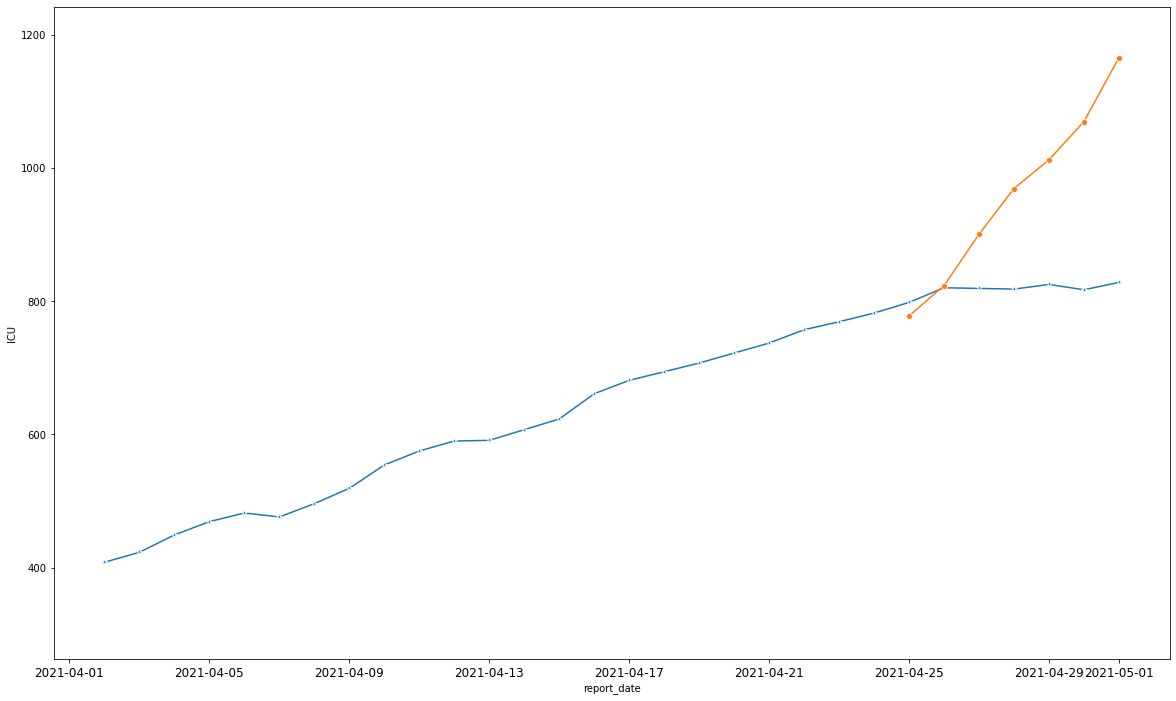

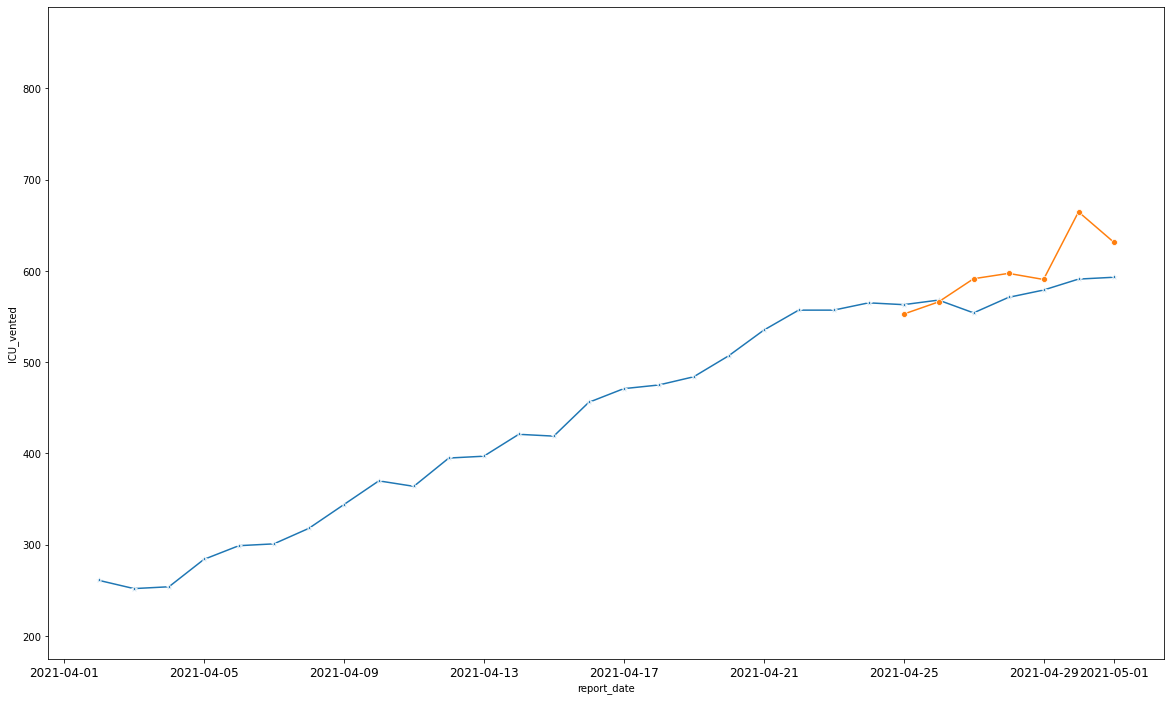

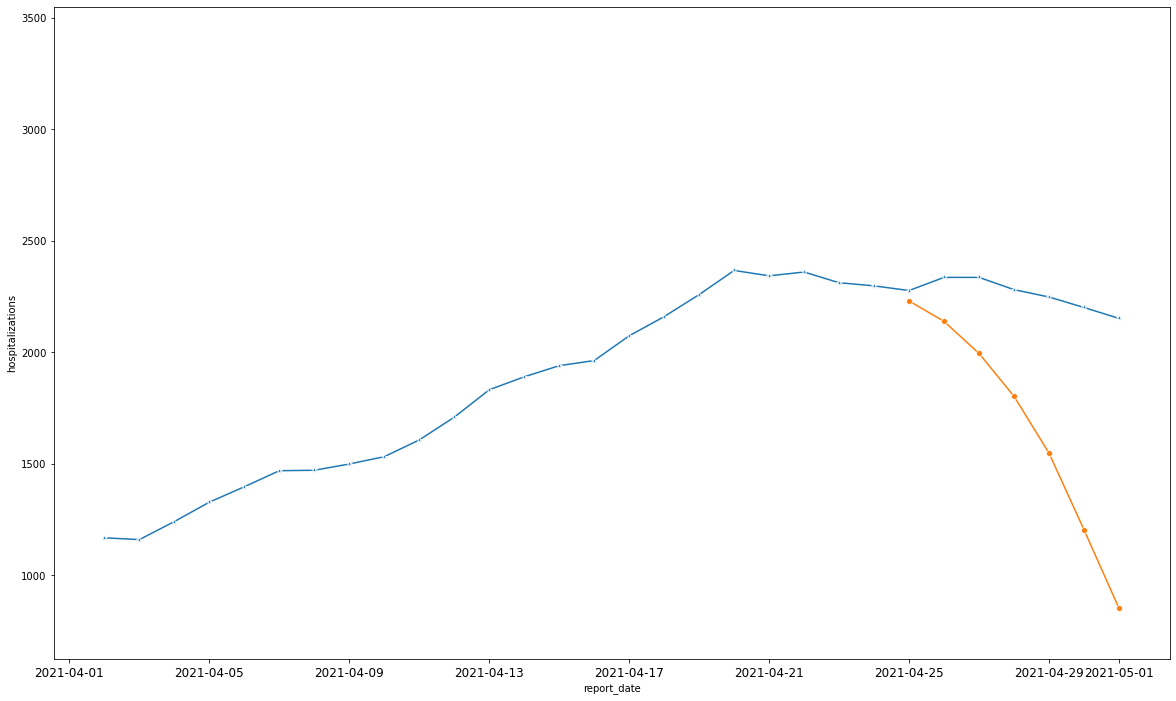

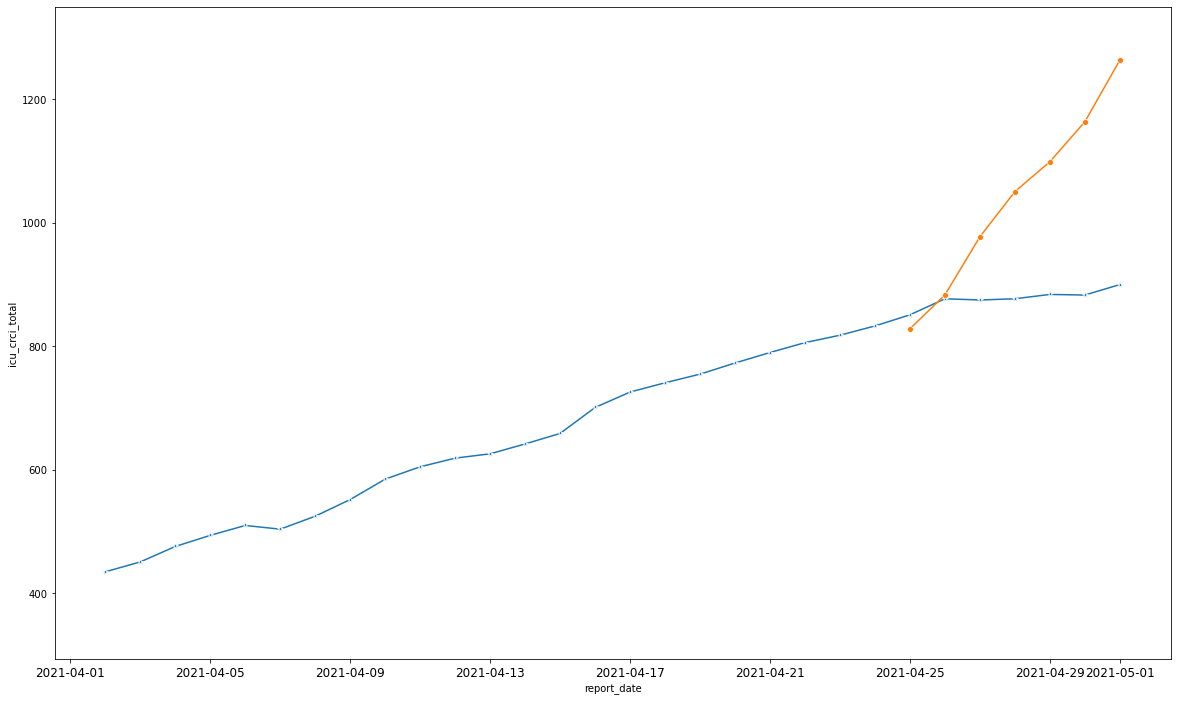

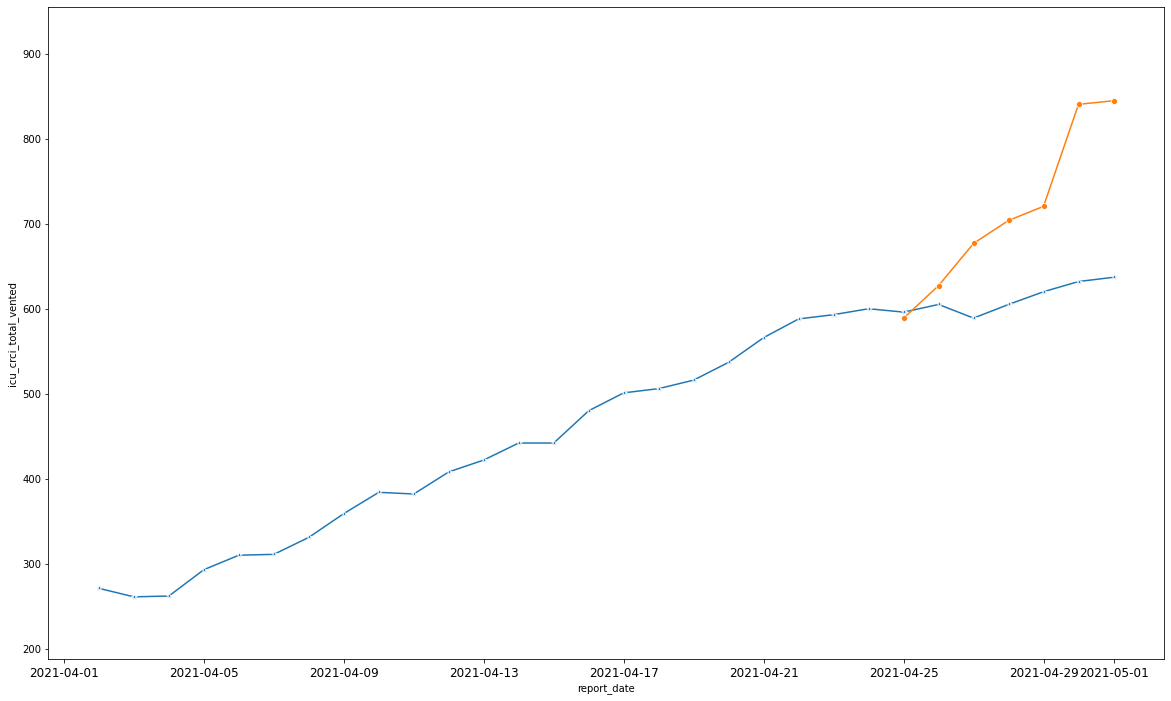

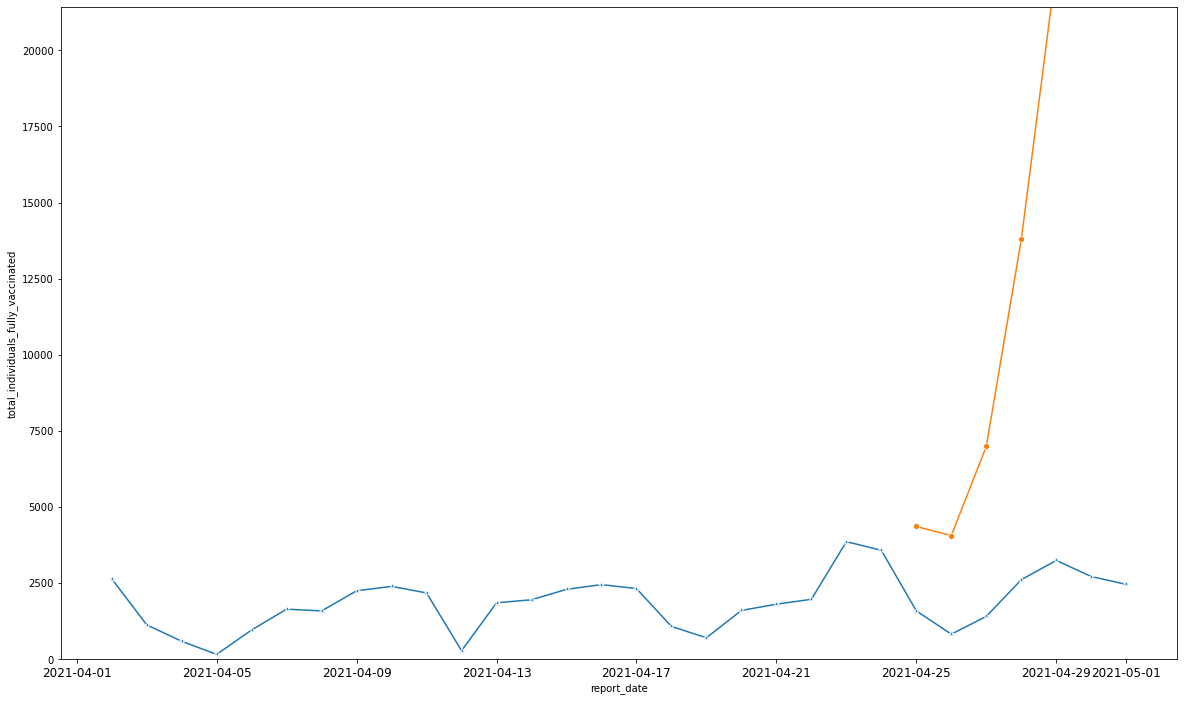

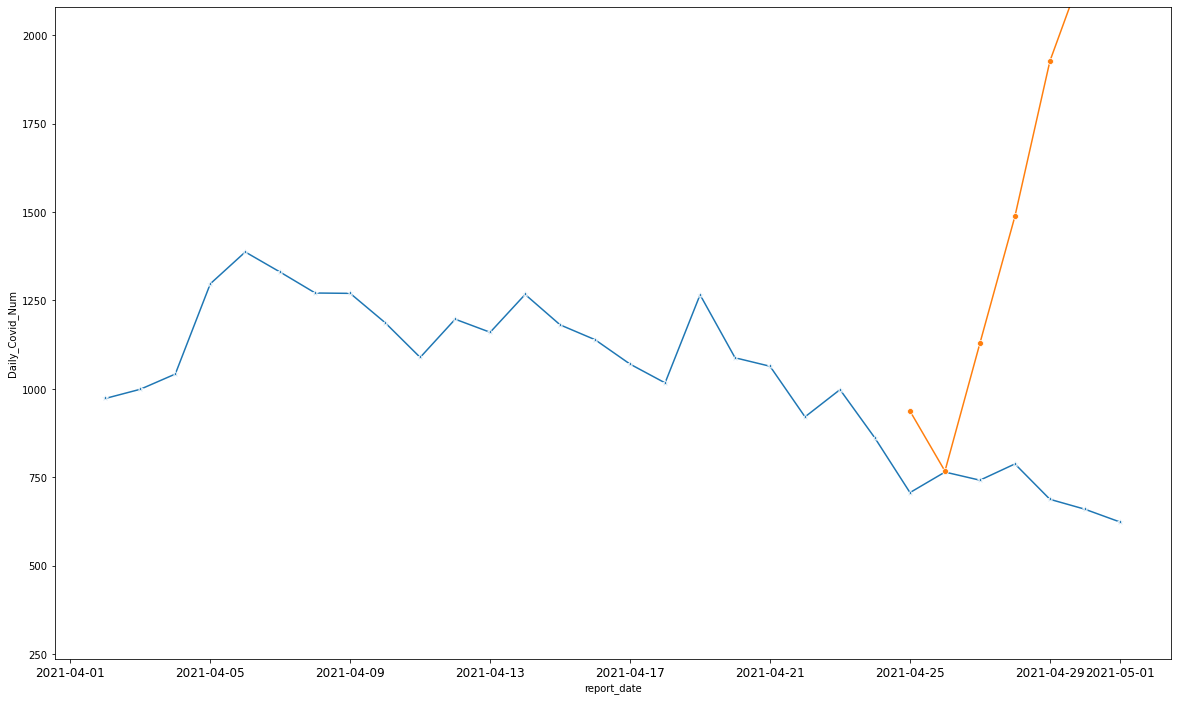

In [145]:
for i in range(0,len(df1.columns)):
    plt.figure(figsize=(20,12))
    sns.lineplot(x=df1.index[-30:],y=df1.iloc[-30:,i],marker='*')
    sns.lineplot(x=df1_test.index,y=df1_forecasted.iloc[:,i],marker='o')
    plt.xticks(fontsize=12)
    plt.ylim(np.min(df1.iloc[:,i]),np.max(df1.iloc[:,i])*1.5)
    plt.show()